In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

**Идея бустинга** заключается в последовательном создании композиции из базовых алгоритмов: каждый новый алгоритм строится с учётом информации, полученной от предыдущих, и направлен на исправление их ошибок. Цель состоит в обучении функции $F$, минимизирующей ожидаемое значение функции потерь $L(F) = E(L(y, F(x)))$. В качестве функции потерь можно использовать квадратичную функцию $\frac{1}{2}(y - F(x))^2$.

Процесс простого бустинга итеративно формирует последовательность приближений $F_t$: $t = 0, 1, \ldots$ жадным методом. $F_t$ получается из предыдущего приближения $F_{t-1}$ аддитивным способом: $F_t = F_{t-1} + h_t$, где $h_t$ — это базовый алгоритм, чаще всего неглубокое регрессионное дерево, обученное на остатках, то есть на разнице между фактическим значением зависимой переменной $y$ и приближением на предыдущем шаге $F_{t-1}$. Проще говоря, приближение $F_t$ — это постоянно обновляемый прогноз, который в конечном итоге должен максимально соответствовать фактическому значению зависимой переменной. Начальное приближение $F_0$ обычно является константным прогнозом.

Дерево решений используется в качестве базового алгоритма по следующим причинам:

- способно моделировать сложные нелинейные зависимости;
- чувствительно к изменению выборки и количеству используемых признаков, что приводит к разнообразию деревьев и улучшению качества композиции;
- неглубокие деревья, используемые в бустинге, являются слабыми алгоритмами (использование сильных алгоритмов в бустинге бессмысленно, так как они быстро переобучаются, и добавление каждой новой функции становится бесполезным).


# Бустинг

Рассматрим задачу регрессии с квадратичной функцией потерь:

$L(y, x) = \frac{1}{N} \sum (y_i - a(x_i))^2 \to \min$


Будем строить композицию из K базовых алгоритмов
$a(x) = a_K(x) = b_1(x) + \cdots + b_K(x)$

Предсказание 1 модели на j-ом объекте на 5 больше, чем нужно.
$y_j = b_1(x_j) - 5$

Обучим вторую модель предсказывать ошибки первой модели
$b_1(x_j) + b_2(x_j) = (y_j + 5) + (-5) = y_j$


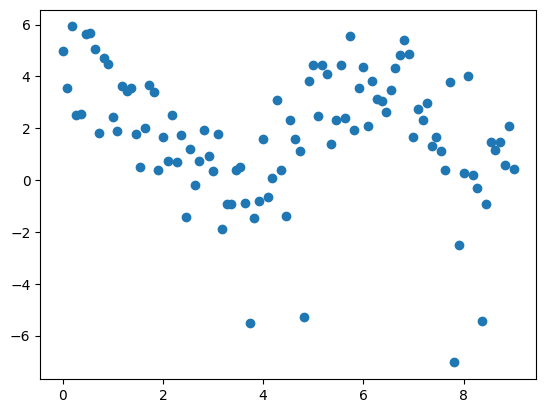

In [ ]:
X = np.linspace(0, 9, 100)
y = 2 * np.cos(X) + 4 * np.random.rand(*X.shape)

ridx = np.random.randint(0, len(X), 15)
y_true_at_random_points = y[ridx].copy()
y[ridx] = np.random.rand(len(ridx)) * 15 - 7.5

X = X.reshape(-1, 1)

plt.scatter(X.ravel(), y)

In [ ]:
model_1 = DecisionTreeRegressor(max_depth=1)
model_1.fit(X, y)
pred1 = model_1.predict(X)

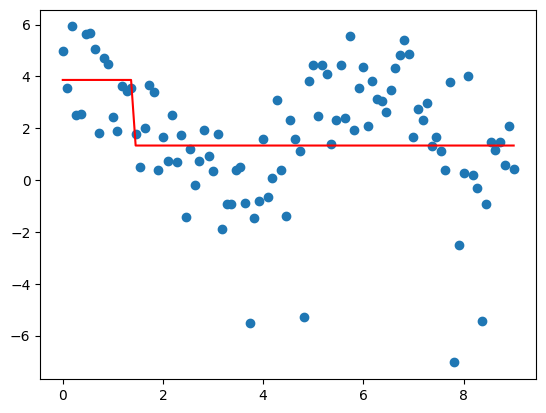

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1, c="r")

In [ ]:
y1 = y - pred1
y1

array([ 1.1141377 , -0.31313287,  2.06308075, -1.35657303, -1.32396356,
        1.77446566,  1.80186121,  1.19148261, -2.04995   ,  0.86210558,
        0.63184522, -1.44235841, -1.98546656, -0.22332397, -0.42345406,
       -0.32075629,  0.43638118, -0.81908597,  0.69510226,  2.3520786 ,
        2.05459784, -0.93053412,  0.32109337, -0.58506584,  1.18518476,
       -0.61800596,  0.42209676, -2.74423391, -0.14162502, -1.50995058,
       -0.61072109,  0.5972135 , -0.41838839, -0.98774552,  0.43408098,
       -3.23539588, -2.26160654, -2.24794895, -0.94397115, -0.80992336,
       -2.22575186, -6.84359097, -2.80022757, -2.14064908,  0.2440665 ,
       -1.99274187, -1.26841633,  1.74297507, -0.95040221, -2.71579993,
        0.98326391,  0.2341742 , -0.22593097, -6.59940207,  2.50118894,
        3.1068415 ,  1.13784827,  3.11470027,  2.74656462,  0.06327659,
        1.00366412,  3.11949222,  1.04489754,  4.235974  ,  0.61004274,
        2.21767818,  3.01146383,  0.76861182,  2.48394435,  1.80

Обучим новое дерево на тех же признаках, но таргетом будет ошибка предыдущего алгоритма

In [ ]:
model_2 = DecisionTreeRegressor(max_depth=1)
model_2.fit(X, y1)
pred2 = model_2.predict(X)

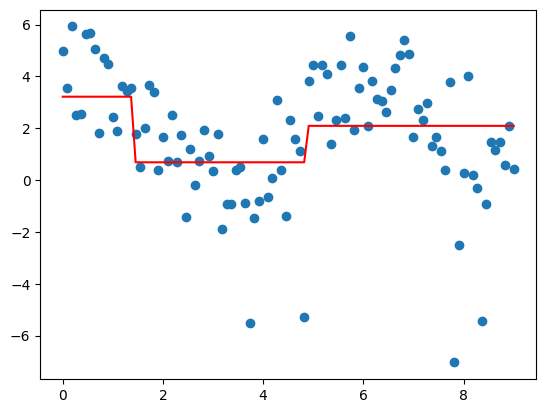

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2, c="r")

In [ ]:
y2 = y1 - pred2
y2

array([ 1.76089337,  0.3336228 ,  2.70983642, -0.70981735, -0.67720789,
        2.42122134,  2.44861688,  1.83823828, -1.40319433,  1.50886125,
        1.27860089, -0.79560273, -1.33871089,  0.4234317 ,  0.22330161,
        0.32599938,  1.08313685, -0.1723303 ,  1.34185793,  2.99883427,
        2.70135351, -0.28377845,  0.96784904,  0.06168983,  1.83194043,
        0.02874972,  1.06885243, -2.09747824,  0.50513065, -0.86319491,
        0.03603458,  1.24396917,  0.22836728, -0.34098985,  1.08083665,
       -2.58864021, -1.61485087, -1.60119328, -0.29721548, -0.16316769,
       -1.57899619, -6.1968353 , -2.1534719 , -1.49389341,  0.89082217,
       -1.3459862 , -0.62166066,  2.38973075, -0.30364654, -2.06904425,
        1.63001958,  0.88092987,  0.4208247 , -5.9526464 ,  1.74195402,
        2.34760658,  0.37861335,  2.35546535,  1.9873297 , -0.69595833,
        0.2444292 ,  2.3602573 ,  0.28566263,  3.47673908, -0.14919217,
        1.45844326,  2.25222892,  0.00937691,  1.72470943,  1.04

In [ ]:
model_3 = DecisionTreeRegressor(max_depth=1)
model_3.fit(X, y2)
pred3 = model_3.predict(X)

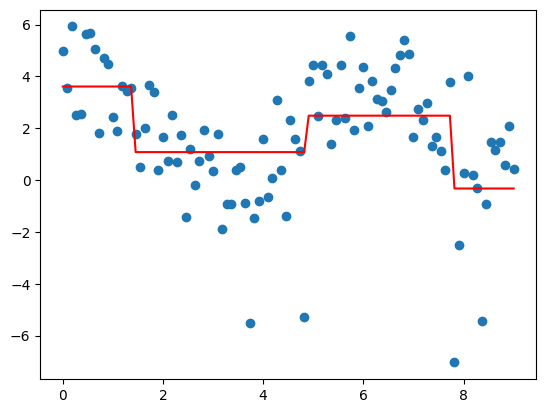

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred1 + pred2 + pred3, c="r")

**Почему же бустинг градиентый?**.

Функция потерь:  
$L(y, x) = \frac{1}{N} \sum (y_i - a(x_i))^2 \to \min $

Строим композицию из K базовых алгоритмов
$a(x) = a_K(x) = b_1(x) + \cdots + b_K(x)$

Строим 1 модель:
$b_1(x) = \arg\min (L(y, b(x)))$

Ошибки 1 модели:
$s^1 = y_i - b_1(x_i)$

Строим 2 модель:
$b_2(x) = \arg\min (L(s^1, b(x)))$

Для k объекта:
$s_i^k = y_i - b_k(x_i) = -\nabla L(y_i, b_k(x_i))$

